In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore', category=UserWarning)



In [2]:
# Load the dataset
file_path = 'simplified_datataGold612.csv'
data = pd.read_csv(file_path, low_memory=False)
data.head()

,country,Age,gender,year,Glasses_status_Pres_DVA,right_distance_acuity_pinhole,left_distance_acuity_pinhole,region,World,Gender,lens_status_right,lens_status_left,poor_vision_cause_right,poor_vision_cause_left,poor_vision_cause_principle,surgery_type_right,surgery_type_left,Study_ID,level,iso3
0,India,41.0,female,2002,False,0.0,0.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
1,India,65.0,male,2002,False,0.0,4.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
2,India,56.0,female,2002,False,0.096910013,0.096910013,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
3,India,52.0,male,2002,False,1.0,0.698970004,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
4,India,42.0,male,2002,False,0.0,0.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70230 entries, 0 to 70229
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        70230 non-null  object 
 1   Age                            69418 non-null  float64
 2   gender                         70213 non-null  object 
 3   year                           70230 non-null  int64  
 4   Glasses_status_Pres_DVA        59821 non-null  object 
 5   right_distance_acuity_pinhole  62183 non-null  object 
 6   left_distance_acuity_pinhole   62175 non-null  object 
 7   region                         53831 non-null  object 
 8   World                          53831 non-null  object 
 9   Gender                         53831 non-null  object 
 10  lens_status_right              15711 non-null  object 
 11  lens_status_left               15711 non-null  object 
 12  poor_vision_cause_right        15711 non-null 

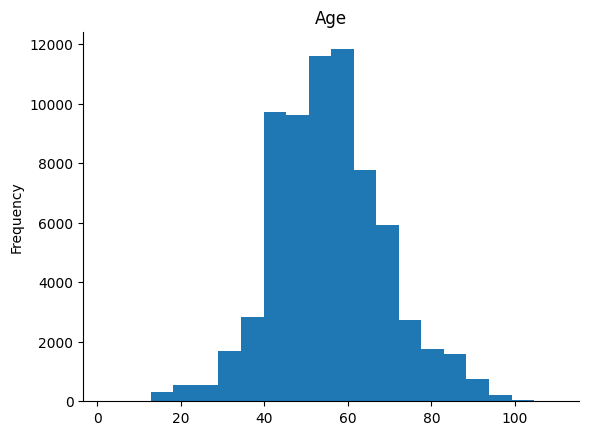

In [4]:
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

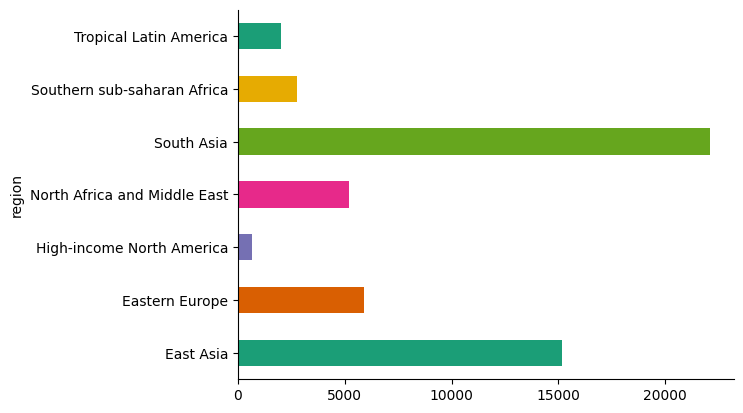

In [5]:
data.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

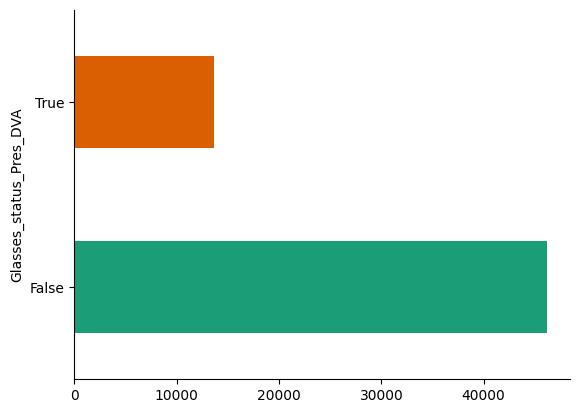

In [6]:
data.groupby('Glasses_status_Pres_DVA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

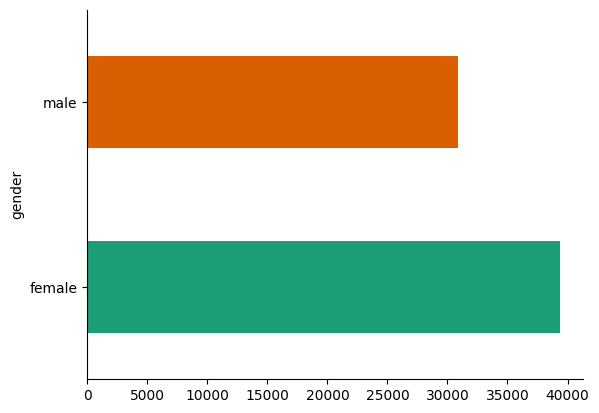

In [7]:
data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# Drop specified columns
data = data.drop(['region', 'World', 'Gender', 'level', 'iso3'], axis=1)


In [9]:
missing_values = data.isnull().sum()
print(missing_values)

country                              0
Age                                812
gender                              17
year                                 0
Glasses_status_Pres_DVA          10409
right_distance_acuity_pinhole     8047
left_distance_acuity_pinhole      8055
lens_status_right                54519
lens_status_left                 54519
poor_vision_cause_right          54519
poor_vision_cause_left           54519
poor_vision_cause_principle      54519
surgery_type_right               68957
surgery_type_left                69135
Study_ID                         53832
dtype: int64


In [10]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [11]:
# Fill missing values with the mean
data = data.fillna(data.mean())

# Check if there are still any missing values
missing_values_after_fill = data.isnull().sum()
print(missing_values_after_fill)


country                          0
Age                              0
gender                           0
year                             0
Glasses_status_Pres_DVA          0
right_distance_acuity_pinhole    0
left_distance_acuity_pinhole     0
lens_status_right                0
lens_status_left                 0
poor_vision_cause_right          0
poor_vision_cause_left           0
poor_vision_cause_principle      0
surgery_type_right               0
surgery_type_left                0
Study_ID                         0
dtype: int64


In [12]:
# Creating binary target variable for one eye (right eye) based on a threshold
threshold = 0.5
data['right_vision_acuity'] = data['right_distance_acuity_pinhole'].apply(lambda x: 1 if x > threshold else 0)

In [13]:
# Separate features and target variable
X = data.drop('right_vision_acuity', axis=1)
y = data['right_vision_acuity']


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70230 entries, 0 to 70229
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        70230 non-null  int64  
 1   Age                            70230 non-null  float64
 2   gender                         70230 non-null  int64  
 3   year                           70230 non-null  int64  
 4   Glasses_status_Pres_DVA        70230 non-null  int64  
 5   right_distance_acuity_pinhole  70230 non-null  int64  
 6   left_distance_acuity_pinhole   70230 non-null  int64  
 7   lens_status_right              70230 non-null  int64  
 8   lens_status_left               70230 non-null  int64  
 9   poor_vision_cause_right        70230 non-null  int64  
 10  poor_vision_cause_left         70230 non-null  int64  
 11  poor_vision_cause_principle    70230 non-null  int64  
 12  surgery_type_right             70230 non-null 

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model: Logistic Regression
Accuracy: 0.999644026769187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       153
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     14046
   macro avg       1.00      0.98      0.99     14046
weighted avg       1.00      1.00      1.00     14046



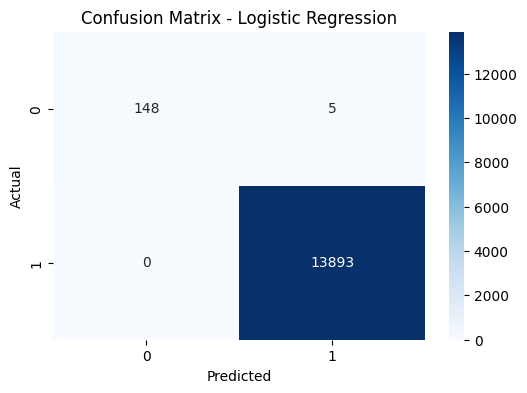

Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



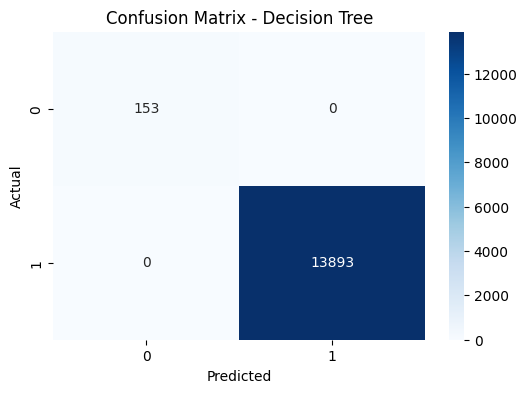

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046



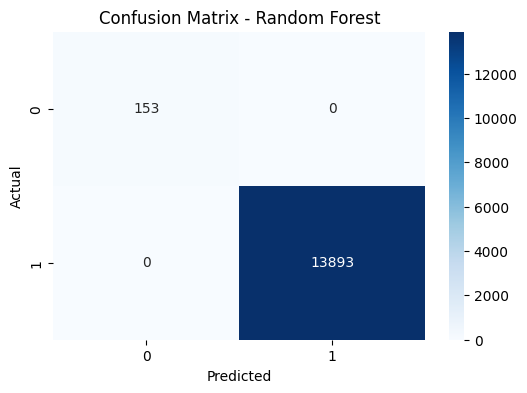

Model: Support Vector Machine
Accuracy: 0.999644026769187
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       153
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     14046
   macro avg       1.00      0.98      0.99     14046
weighted avg       1.00      1.00      1.00     14046



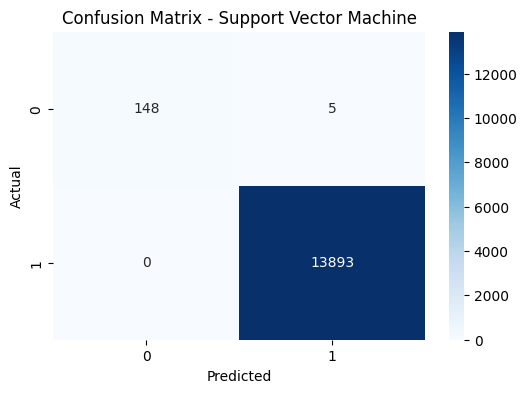

In [16]:
# Initialize models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000)),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC())
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [17]:
# Perform cross-validation and print results
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average cross-validation score: {cv_scores.mean()}\n")

Model: Logistic Regression
Cross-validation scores: [0.95365229 1.         1.         0.99786416 0.99679624]
Average cross-validation score: 0.9896625373771892

Model: Decision Tree
Cross-validation scores: [0.99921686 1.         1.         1.         1.        ]
Average cross-validation score: 0.9998433717784423

Model: Random Forest
Cross-validation scores: [0.99914566 1.         1.         0.95016375 0.99886089]
Average cross-validation score: 0.9896340595187242

Model: Support Vector Machine
Cross-validation scores: [0.99793536 1.         1.         0.99501637 0.99651146]
Average cross-validation score: 0.9978926384735868

